This notebook performs clustering of the customers based on the percentages of items they bought (i.e. their spending patterns on different categories of clothing)

In [ ]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
#read the data
store = pd.read_csv("store.csv")
store.head()

,ZIP_CODE,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,...,VALPHON,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP
0,1001,2,368.46,0,184.23,11,0.18,0.00,0.00,0.30,...,N,0,5,0,0.00,31.81,111.00,10,0.00,0
1,1028,4,258.00,1,64.50,11,0.26,0.16,0.00,0.00,...,Y,0,4,2,50.00,32.72,43.50,10,0.03,1
2,1056,2,77.00,0,38.50,11,1.00,0.00,0.00,0.00,...,N,0,4,0,0.00,100.00,68.60,16,0.00,0
3,1118,8,846.06,1,105.75,11,0.38,0.00,0.05,0.06,...,Y,0,9,6,66.67,23.27,26.96,10,0.00,0
4,1107,1,87.44,0,87.44,11,0.20,0.20,0.00,0.00,...,Y,0,0,0,0.00,28.52,24.50,20,0.00,0


In [ ]:
#there are no missing values
pd.set_option('display.max_columns', None)  

store.describe()

,ZIP_CODE,FRE,MON,CC_CARD,AVRG,PC_CALC20,PSWEATERS,PKNIT_TOPS,PKNIT_DRES,PBLOUSES,PJACKETS,PCAR_PNTS,PCAS_PNTS,PSHIRTS,PDRESSES,PSUITS,POUTERWEAR,PJEWELRY,PFASHION,PLEGWEAR,PCOLLSPND,AMSPEND,PSSPEND,CCSPEND,AXSPEND,TMONSPEND,OMONSPEND,SMONSPEND,PREVPD,GMP,PROMOS,DAYS,FREDAYS,MARKDOWN,CLASSES,COUPONS,STYLES,STORES,WEB,MAILED,RESPONDED,RESPONSERATE,HI,LTFREDAY,CLUSTYPE,PERCRET,RESP
count,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000,21740.000000
mean,48935.216007,5.064213,472.888236,0.383763,113.889105,12.571803,0.213665,0.027163,0.041295,0.093482,0.135575,0.086004,0.069286,0.066285,0.068392,0.034135,0.018358,0.009751,0.029787,0.012664,0.072666,14.217662,147.822047,286.851738,24.257214,90.008151,31.990516,222.471736,41.668633,0.521913,11.577277,437.630405,170.853458,0.187325,7.145998,0.750046,17.205152,2.340064,0.041536,4.672723,1.193606,17.276674,37.888989,80.240028,15.106670,0.130584,0.166099
std,24086.448839,6.420276,640.050799,0.486312,87.249794,2.461413,0.230224,0.068648,0.109897,0.136428,0.182822,0.140095,0.132425,0.116869,0.156893,0.130995,0.099710,0.036872,0.078223,0.049601,0.174214,149.863657,395.139174,441.460820,113.855957,184.615883,97.163860,362.774251,108.106536,0.142486,7.142376,192.901601,146.171562,0.129171,5.345992,1.673245,24.616108,1.603060,0.199532,3.547191,1.828949,24.543108,28.149856,78.730265,12.214348,0.556766,0.372178
min,0.000000,1.000000,0.990000,0.000000,0.490000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.090000,0.000000,0.000000,0.000000
25%,30339.000000,1.000000,135.605000,0.000000,60.990000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.460000,5.000000,287.000000,67.000000,0.090000,3.000000,0.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000,18.410000,24.957500,5.000000,0.000000,0.000000
50%,48335.000000,3.000000,263.490000,0.000000,92.070000,11.000000,0.160000,0.000000,0.000000,0.050000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,147.600000,0.000000,0.000000,0.000000,108.000000,0.000000,0.550000,12.000000,447.000000,124.000000,0.180000,6.000000,0.000000,9.000000,2.000000,0.000000,4.000000,0.000000,0.000000,29.520000,52.000000,11.000000,0.000000,0.000000
75%,66707.000000,6.000000,569.000000,1.000000,139.505000,16.000000,0.310000,0.030000,0.030000,0.140000,0.230000,0.130000,0.090000,0.100000,0.060000,0.000000,0.000000,0.000000,0.030000,0.003524,0.030000,0.000000,127.937500,321.942500,0.000000,109.992500,0.000000,287.572500,0.000000,0.620000,17.000000,630.000000,230.000000,0.280000,10.000000,1.000000,20.000000,3.000000,0.000000,8.000000,2.000000,30.000000,50.000000,107.000000,22.000000,0.090000,0.000000
max,99687.000000,115.000000,22511.490000,1.000000,1919.880000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10642.720000,11476.800000,22511.490000,4099.920000,5562.460000,2189.000000,13224.070000,2259.500000,0.990

### fractions spent on specific types of clothing
can we cluster customers based on the products they buy?

In [ ]:
apparels = ['PSWEATERS','PKNIT_TOPS', 'PKNIT_DRES', 'PBLOUSES', 'PJACKETS', 'PCAR_PNTS',
              'PCAS_PNTS', 'PSHIRTS', 'PDRESSES', 'PSUITS', 'POUTERWEAR', 'PJEWELRY',
              'PFASHION', 'PLEGWEAR','PCOLLSPND']
apparels_df = store[apparels]

In [ ]:
# the fractions don't sum to one - There might be smaller miscalleneous categories that aren't recorded. 
#Some customers also have fractions exceeding 1 - meaning some categories overlap
(store[apparels].sum(axis = 1) < 1).value_counts()


True     16300
False     5440
dtype: int64

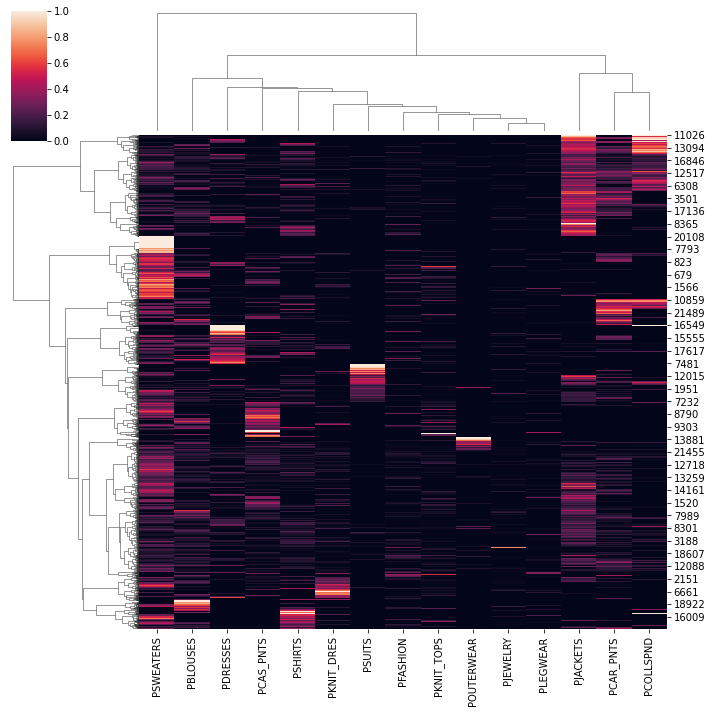

In [ ]:
my_map = sns.clustermap(apparels_df, metric = 'cityblock',method = 'ward')
my_map
plt.savefig("store_clustering.png", dpi = 300, bbox_inches='tight')
# we use manhattan distance with Ward linkage: manhattan distance more robust to outliers, even suggested that it's better for high dimensional data
#SUGGESTION that the response rate is different for people who buy different groups of products. 

In [ ]:
map_linkages = my_map.dendrogram_row.calculated_linkage
#get the calculated linkages between each observation (these correspond to the method in which the row dendogram was built)

map_linkages.shape
#linkage matrix Z, equivalent to scipy.cluster.hierarchy.linkage

(21739, 4)

In [ ]:
#https://stackoverflow.com/questions/56526707/extract-rows-of-clusters-in-hierarchical-clustering-using-seaborn-clustermap
import scipy.cluster.hierarchy as sch

#cut the row dendogram at level three, and get the cluster labels
clusters = sch.fcluster(map_linkages, t = 3, criterion = 'maxclust')
clusters = pd.Series(clusters)
clusters

0        3
1        3
2        2
3        3
4        3
        ..
21735    3
21736    3
21737    1
21738    3
21739    3
Length: 21740, dtype: int32

In [ ]:
clusters.value_counts() #sizes look correct, as per the row dendogram cut at three clusters (above)

3    14543
1     4435
2     2762
dtype: int64

In [ ]:
#check manually based on clusterplot above
print(clusters[11026], clusters[13094], clusters[16846], clusters[12517],clusters[6308],clusters[3501])

print(clusters[20108], clusters[7793], clusters[823], clusters[679],clusters[1566])
      
print(clusters[10859],clusters[21489], clusters[16549], clusters[15555])

1 1 1 1 1 1
2 2 2 2 2
3 3 3 3


In [ ]:
#rename the labels
product_cluster = clusters.replace({1: 'jackets_carpnts_coll', 2: 'sweater',3:'other'})

store = store.assign(product_cluster= product_cluster)

In [ ]:
#there is suggestion that the mean response rate differs based on our cluster labels. 
store.groupby(product_cluster)['RESP'].mean()

jackets_carpnts_coll    0.137091
other                   0.187650
sweater                 0.099203
Name: RESP, dtype: float64

In [ ]:
store.to_csv("stores_clustering.csv")